In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import random
import os 
import imageio 
from IPython.display import Image
import pandas as pd
import csv

In [2]:
# Define the bounding box for the Mandelbrot set
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5

# Fix maximum number of iterations
i_max = 100
s_values = [10, 200, 400, 600, 800, 1000]
num_runs = 5

# Create arrays to store results
num_samples = len(s_values)
area_estimations_sum = np.zeros((i_max, num_samples, num_runs))
reference_areas = np.zeros(num_samples)

# Loop for multiple runs
for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")

    # Set the seed for each run
    np.random.seed()

    for idx, s in enumerate(s_values):
        reference_s = s  # Adjust the reference s value for each s in the loop
        reference_i_max = 100  # Keep the reference i_max constant
        reference_area = 0.0

        for _ in range(reference_s):
            x = np.random.uniform(xmin, xmax)
            y = np.random.uniform(ymin, ymax)
            c = complex(x, y)
            z = c

            for _ in range(reference_i_max):
                if abs(z) > 2.0:
                    break
                z = z * z + c
            else:
                # Point is inside the Mandelbrot set
                reference_area += 1

        reference_area = (reference_area / reference_s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area
        reference_areas[idx] = reference_area
        print(f"Reference Area for Run {run + 1}: {reference_area}, s: {s}")

        # Use this reference area for subsequent calculations
        for j in range(1, i_max + 1):
            AM = 0.0
            for _ in range(s):
                x = np.random.uniform(xmin, xmax)
                y = np.random.uniform(ymin, ymax)
                c = complex(x, y)
                z = c

                for _ in range(j):
                    if abs(z) > 2.0:
                        break
                    z = z * z + c
                else:
                    # Point is inside the Mandelbrot set
                    AM += 1

            AM = (AM / s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area
            area_estimations_sum[j - 1, idx, run] = AM

# Calculate the reference area average
reference_areas_avg = np.mean(reference_areas)

Run 1/5
Reference Area for Run 1: 2.6999999999999997, s: 10
Reference Area for Run 1: 1.215, s: 200
Reference Area for Run 1: 1.4849999999999999, s: 400
Reference Area for Run 1: 1.47, s: 600
Reference Area for Run 1: 1.6649999999999998, s: 800
Reference Area for Run 1: 1.7100000000000002, s: 1000
Run 2/5
Reference Area for Run 2: 1.8000000000000003, s: 10
Reference Area for Run 2: 1.6649999999999998, s: 200
Reference Area for Run 2: 1.3499999999999999, s: 400
Reference Area for Run 2: 1.4849999999999999, s: 600
Reference Area for Run 2: 1.3499999999999999, s: 800
Reference Area for Run 2: 1.773, s: 1000
Run 3/5
Reference Area for Run 3: 1.8000000000000003, s: 10
Reference Area for Run 3: 1.7100000000000002, s: 200
Reference Area for Run 3: 1.53, s: 400
Reference Area for Run 3: 1.545, s: 600
Reference Area for Run 3: 1.6425, s: 800
Reference Area for Run 3: 1.5030000000000001, s: 1000
Run 4/5
Reference Area for Run 4: 1.8000000000000003, s: 10
Reference Area for Run 4: 1.6649999999999

In [3]:
# Save the averaged results and absolute errors to CSV files
csv_filename_avg_area = 'convergence_results_avg_area2.csv'
csv_filename_avg_error = 'convergence_results_avg_error2.csv'
csv_filename_subtraction = 'convergence_results_subtraction2.csv'

with open(csv_filename_avg_area, 'w', newline='') as csvfile_area, open(csv_filename_avg_error, 'w', newline='') as csvfile_error, open(csv_filename_subtraction, 'w', newline='') as csvfile_subtraction:
    fieldnames_area = ['j', 's'] + [f'run_{i + 1}' for i in range(num_runs)] + ['average']
    fieldnames_error = ['j', 's', 'average_absolute_error', 'errors']  # Fix here
    fieldnames_subtraction = ['j', 's'] + [f'run_{i + 1}' for i in range(num_runs)] + ['average_subtraction', 'reference_value']

    writer_area = csv.DictWriter(csvfile_area, fieldnames=fieldnames_area)
    writer_error = csv.DictWriter(csvfile_error, fieldnames=fieldnames_error)
    writer_subtraction = csv.DictWriter(csvfile_subtraction, fieldnames=fieldnames_subtraction)

    # Write headers
    writer_area.writeheader()
    writer_error.writeheader()
    writer_subtraction.writeheader()

    # Write data
    for j in range(1, i_max + 1, 5):  # Change here to iterate every 5
        for idx, s in enumerate(s_values):
            row_data_area = {'j': j, 's': s}
            row_data_error = {'j': j, 's': s, 'errors': []}  # Fix here
            row_data_subtraction = {'j': j, 's': s, 'reference_value': reference_areas[idx]}  # Change to reference_areas

            for run in range(num_runs):
                row_data_area[f'run_{run + 1}'] = area_estimations_sum[j - 1, idx, run]

                error_value = area_estimations_sum[j - 1, idx, run] - reference_areas[idx]  # Change to reference_areas
                row_data_error['errors'].append(error_value)

            row_data_area['average'] = np.mean(area_estimations_sum[j - 1, idx])
            row_data_error['average_absolute_error'] = np.abs(row_data_area['average'] - reference_areas[idx])  # Change to reference_areas

            subtraction_values = [area_estimations_sum[j - 1, idx, run] - reference_areas[idx] for run in range(num_runs)]  # Change to reference_areas
            row_data_subtraction.update({f'run_{run + 1}': subtraction_values[run] for run in range(num_runs)})
            row_data_subtraction['average_subtraction'] = np.mean(subtraction_values)

            writer_area.writerow(row_data_area)
            writer_error.writerow(row_data_error)
            writer_subtraction.writerow(row_data_subtraction)

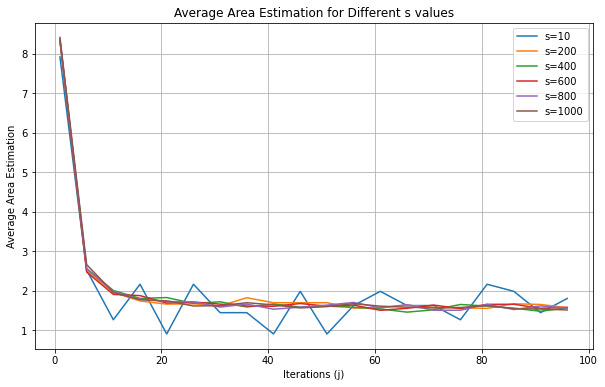

In [4]:
# Load the CSV file
file_path = 'convergence_results_avg_area2.csv'  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Get unique 's' values
s_values = data['s'].unique()

plt.figure(figsize=(10, 6))

# Plot for each 's' value
for s in s_values:
    s_data = data[data['s'] == s]
    plt.plot(s_data['j'], s_data['average'], label=f's={s}')

plt.xlabel('Iterations (j)')
plt.ylabel('Average Area Estimation')
plt.legend()
plt.title('Average Area Estimation for Different s values')
plt.grid(True)
plt.show()

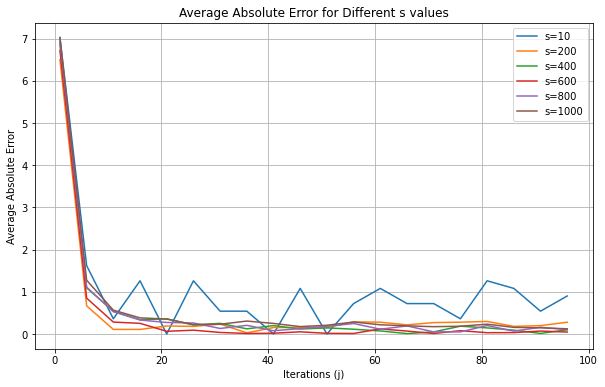

In [5]:
# Load the CSV file
file_path = 'convergence_results_avg_error2.csv'  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Get unique 's' values
s_values = data['s'].unique()

plt.figure(figsize=(10, 6))

# Plot for each 's' value
for s in s_values:
    s_data = data[data['s'] == s]
    plt.plot(s_data['j'], s_data['average_absolute_error'], label=f's={s}')

plt.xlabel('Iterations (j)')
plt.ylabel('Average Absolute Error')
plt.legend()
plt.title('Average Absolute Error for Different s values')
plt.grid(True)
plt.show()